In [77]:

import tensorflow as tf
print(tf.__version__)

2.0.0


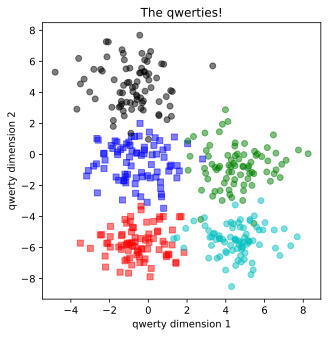

In [119]:
import numpy as np

from jagpascoe_ML_toolkit.createDataFunctions import createQwerties, splitData
data, labels = createQwerties(clusters=5, nPerClust=80, blur=1.20, centroids=np.array([[0,0],[0,5],[0,-5],[5,0],[5,-5]]), draw=True)
#data, labels = createQwerties(clusters=2, nPerClust=100, blur=1.20, centroids=np.array([[0,0],[0,5]]), draw=True)
data = data.numpy()
labels=labels.numpy()               

In [127]:
# Set random seed
tf.random.set_seed(42)


# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax'),
    ])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(), 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
history=model_1.fit(data, labels, epochs=20)

model_1.evaluate(data, labels)

Train on 400 samples
Epoch 1/20
400/400 [==============================] - 1s 2ms/sample - loss: 16.2644 - accuracy: 0.2350
Epoch 2/20
400/400 [==============================] - 0s 101us/sample - loss: 17.3934 - accuracy: 0.2775
Epoch 3/20
400/400 [==============================] - 0s 113us/sample - loss: 16.4400 - accuracy: 0.2950
Epoch 4/20
400/400 [==============================] - 0s 106us/sample - loss: 17.2780 - accuracy: 0.1775
Epoch 5/20
400/400 [==============================] - 0s 103us/sample - loss: 23.8174 - accuracy: 0.0000e+00
Epoch 6/20
400/400 [==============================] - 0s 93us/sample - loss: 33.1324 - accuracy: 0.0000e+00
Epoch 7/20
400/400 [==============================] - 0s 104us/sample - loss: 43.7688 - accuracy: 0.0000e+00
Epoch 8/20
400/400 [==============================] - 0s 110us/sample - loss: 54.7886 - accuracy: 0.0000e+00
Epoch 9/20
400/400 [==============================] - 0s 107us/sample - loss: 66.1213 - accuracy: 0.0000e+00
Epoch 10/20
400/4

[185.01825756072998, 0.0]

In [128]:
model_1.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             multiple                  24        
_________________________________________________________________
dense_95 (Dense)             multiple                  36        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

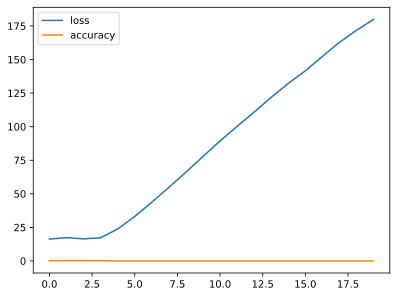

In [129]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [126]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [111]:
plot_decision_boundary(model=model_1, X=data, y=labels)

AttributeError: The layer has never been called and thus has no defined output shape.